--Araba, Külahta Dondurma, Cricket Topu--
--!! Şuan model dosyası Proje Klasörü içinde bulunuyor..!!
--Yine de Modeli tekrardan diske PICKLE ile oluşturmak ister misiniz?? Bu işlem zaman alabilir!
Hayır DEVAM EDELİM= n - Evet oluştursun= y  : n
Resim URLsi Giriniz: https://www.stil-vagonu.com/wp-content/uploads/2018/12/ikinci-el-araba.jpg


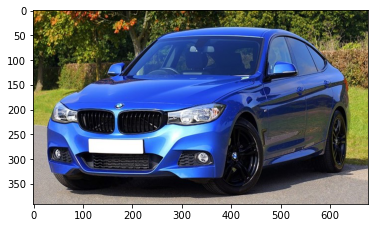

cars = 91.17160471753584%
ice_cream_cone = 1.808277812390355%
cricket_ball = 7.0201174700737905%


ValueError: X.shape[1] = 3 should be equal to 67500, the number of features at training time

In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.transform import resize
from skimage.io import imread


 

datadir="DatasetForImageClassification/"
siniflar=['cars','ice_cream_cone','cricket_ball']
ham_veriler=[] 
sonuclanacak=[]

#ilk for ile her kategoriyi tarıyorum, ikinci for ile içindeki resimleri resize ve flat edip listeye atıyorum
for sinif in siniflar:
    path=os.path.join(datadir,sinif)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        ham_veriler.append(img_resized.flatten())
        sonuclanacak.append(siniflar.index(sinif))

print("--Araba, Külahta Dondurma, Cricket Topu--")
print("--!! Şuan model dosyası Proje Klasörü içinde bulunuyor..!!")            
print("--Yine de Modeli tekrardan diske PICKLE ile oluşturmak ister misiniz?? Bu işlem zaman alabilir!")
secim=input("Hayır DEVAM EDELİM= n - Evet oluştursun= y  : ")            

if(secim=='y'or secim=='Y'):
    print("Model oluşturma işlemi Başlıyor..")
    #burada ham_veriler listesini numpy dizisi haline getiriyorum ki 'iloc[]' edebileyim
    duzenli_veriler=np.array(ham_veriler) 
    sonuc=np.array(sonuclanacak)
    df=pd.DataFrame(duzenli_veriler)
    # sonuc kolonumu ekliyorum
    df['Sonuc']=sonuc 
    #df

    # veri dizimi train için iloc ediyorum
    x=df.iloc[:,:-1]
    y=df.iloc[:,-1]

    # klasik train_test_split işlemi
    # stratify ile etiketlere bölüyorum (sonuc)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
    print('Egitim Tamamlandı!')

    # optimum grid-search işlemi -kernelde rbf ve poly denetiyorum
    grid_parametreleri={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
    search_VC=svm.SVC(probability=True)
    print("Model eğitim işlemi başladı lütfen bekleyiniz... Tahmini: 10 dakika")
    model=GridSearchCV(search_VC,grid_parametreleri)
    model.fit(x_train,y_train)
    print("Model eğitim işlemi bitti!")

    #modelin doğruluk oranını yazdırıyorum
    y_prediction=model.predict(x_test)
    print(f"Modelin doğruluk oranı: {accuracy_score(y_prediction,y_test)*100}% ")

    # modeli PICKLE ile diske kaydediyorum
    pick = open('siniflama_model.p','wb')
    pickle.dump(model,pick)
    pick.close()
    print("Pickle başarıyla oluşturuldu!! Kontrol Ediniz ve Kodu TEKRARDAN ÇALIŞTIRARAK HAYIR seçeneği ile devam ediniz..")
    


elif(secim=='n'or secim=='N'):
    
    # modeli çağırıyorum
    model=pickle.load(open('siniflama_model.p','rb'))
    # tahmin edilecek resim giriliyor
    url=input('Resim URLsi Giriniz: ')
    img=imread(url)
    plt.imshow(img)
    plt.show()
    
    # tahmin edilecek resmi düzenleyip oranları for döngüsü ile yazdırıyorum
    img_resize=resize(img,(150,150,3))
    deneme_resim=[img_resize.flatten()]
    tahmin=model.predict_proba(deneme_resim)
    for ind,cesit in enumerate(siniflar):
      print(f'{cesit} = {tahmin[0][ind]*100}%')
    print("Tahmin edilen : "+ siniflar[model.predict(tahmin)[0]])

    




